# Imports

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

import optuna

## Functions

In [3]:
def ml_metrics(y_val, y_pred, model_name, k): 
    acc       = mt.accuracy_score(y_val, y_pred)
    precision = mt.precision_score(y_val, y_pred)
    recall    = mt.recall_score(y_val, y_pred)
    f1_score  = mt.f1_score(y_val, y_pred)
    df_results = pd.DataFrame( {'Model':[model_name],
                                'K': [k],
                                'Accuracy': [acc],
                                'Precision': [precision],
                                'Recall': [recall],
                                'F1-Score': [f1_score]})
    
    return df_results

# Carregando Dados

In [5]:
# Dados de Treino
X_train = pd.read_csv('datasets/classificacao/X_training.csv')
y_train = pd.read_csv('datasets/classificacao/y_training.csv').values.ravel()

# Dados de Validação
X_val = pd.read_csv('datasets/classificacao/X_validation.csv')
y_val = pd.read_csv('datasets/classificacao/y_validation.csv').values.ravel()

# Dados de Teste
X_test = pd.read_csv('datasets/classificacao/X_test.csv')
y_test = pd.read_csv('datasets/classificacao/y_test.csv').values.ravel()

In [6]:
print(f'Dados de Treino:    Linhas: {X_train.shape[0]}   Colunas: {X_train.shape[1]}')
print(f'Dados de Validação: Linhas: {X_val.shape[0]}   Colunas: {X_val.shape[1]}')
print(f'Dados de Teste:     Linhas: {X_test.shape[0]}   Colunas: {X_test.shape[1]}')

Dados de Treino:    Linhas: 72515   Colunas: 25
Dados de Validação: Linhas: 31079   Colunas: 25
Dados de Teste:     Linhas: 25893   Colunas: 25


# Ensaio

Métricas do Ensaio:

- Accuracy
- Precision
- Recall
- F1-Score

## KNN

### Predict with Fine Tuning

In [55]:
knn_results = pd.DataFrame()
for k in range(3, 30,2):
    # model definition
    knn_model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    
    # model fit
    knn_model.fit(X_train, y_train)
    
    # model predict
    y_pred = knn_model.predict(X_val)
    
    # metrics
    k_results = ml_metrics(y_val, y_pred, 'KNN', k)
    
    # saving results
    knn_results = pd.concat([knn_results, k_results], axis=0)

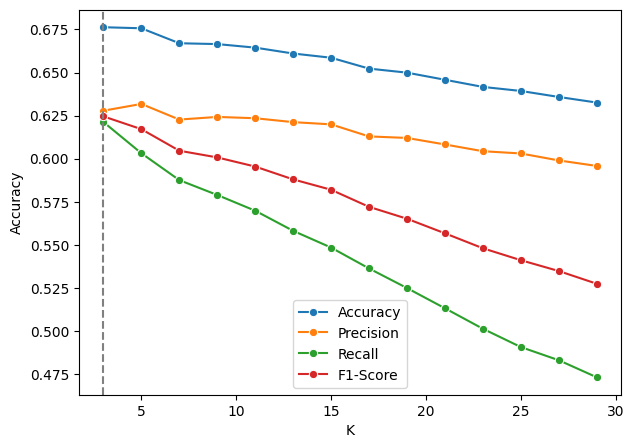

In [56]:
plt.figure(figsize=(7,5))
sns.lineplot(x = 'K', y = 'Accuracy', data=knn_results, marker='o', label='Accuracy')
sns.lineplot(x = 'K', y = 'Precision', data=knn_results, marker='o', label='Precision')
sns.lineplot(x = 'K', y = 'Recall', data=knn_results, marker='o', label='Recall')
sns.lineplot(x = 'K', y = 'F1-Score', data=knn_results, marker='o', label='F1-Score');

k_max = knn_results.loc[knn_results['F1-Score'] == knn_results['F1-Score'].max(), 'K'][0]
plt.axvline(x=k_max, color='gray',linestyle='--');

### Best Parameters

In [91]:
knn_best_params = {'k':3}

## Desicion Tree

### Training with Fine Tuning

In [23]:
dt_results = pd.DataFrame()
for md in range(2, 50):
    dt_model = DecisionTreeClassifier(max_depth=md)
    
    dt_model.fit(X_train, y_train)
    
    y_pred = dt_model.predict(X_val)
    
    i_results = ml_metrics(y_val, y_pred, 'Decision Tree', md)
    
    dt_results = pd.concat([dt_results,i_results], axis=0)

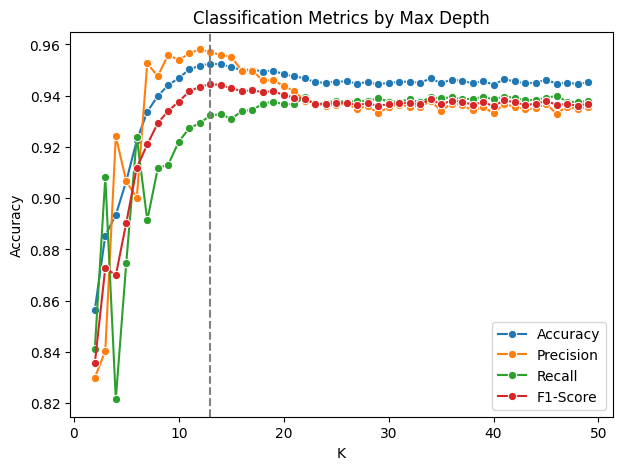

In [53]:
plt.figure(figsize=(7,5))
plt.title('Classification Metrics by Max Depth')
sns.lineplot(x = 'K', y = 'Accuracy',  data=dt_results, marker='o', label='Accuracy')
sns.lineplot(x = 'K', y = 'Precision', data=dt_results, marker='o', label='Precision')
sns.lineplot(x = 'K', y = 'Recall',    data=dt_results, marker='o', label='Recall')
sns.lineplot(x = 'K', y = 'F1-Score',  data=dt_results, marker='o', label='F1-Score');

k_max = dt_results.loc[dt_results['F1-Score'] == dt_results['F1-Score'].max(), 'K'][0]
plt.axvline(x=k_max, color='gray',linestyle='--');

### Best Params

In [90]:
dt_best_params = {'max_depth':13}

## Random Forest

### Training with Fine Tuning

In [72]:
def rf_fine_tuning(trial):
    n_estimators = trial.suggest_int('n_estimators', 5, 30)
    max_depth = trial.suggest_int('max_depth', 5, 30)

    rf_model = RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth)

    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_val)

    return mt.f1_score(y_val, y_pred)

In [159]:
study = optuna.create_study(direction='maximize')
study.optimize(rf_fine_tuning, n_trials=10)

[I 2023-08-19 17:37:56,409] A new study created in memory with name: no-name-db4aa9cc-bc7d-4f27-b538-612ed61bf70d
[I 2023-08-19 17:37:59,342] Trial 0 finished with value: 0.9553003200903785 and parameters: {'n_estimators': 20, 'max_depth': 16}. Best is trial 0 with value: 0.9553003200903785.
[I 2023-08-19 17:38:02,766] Trial 1 finished with value: 0.9538183597425571 and parameters: {'n_estimators': 25, 'max_depth': 15}. Best is trial 0 with value: 0.9553003200903785.
[I 2023-08-19 17:38:04,584] Trial 2 finished with value: 0.9492688074777627 and parameters: {'n_estimators': 15, 'max_depth': 12}. Best is trial 0 with value: 0.9553003200903785.
[I 2023-08-19 17:38:08,605] Trial 3 finished with value: 0.9577623851829544 and parameters: {'n_estimators': 28, 'max_depth': 25}. Best is trial 3 with value: 0.9577623851829544.
[I 2023-08-19 17:38:09,774] Trial 4 finished with value: 0.926029857447525 and parameters: {'n_estimators': 13, 'max_depth': 8}. Best is trial 3 with value: 0.95776238518

In [161]:
optuna.visualization.plot_optimization_history(study)

### Best Parameters

In [162]:
rf_best_params = study.best_params
rf_best_params

{'n_estimators': 28, 'max_depth': 25}

## Logistic Regression

### Training with Fine Tuning

In [163]:
def lg_fine_tuning(trial):
    C = trial.suggest_float('C', 0, 2)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
    max_iter = trial.suggest_int('max_iter', 300, 500)

    lg_model = LogisticRegression(C = C, solver=solver, max_iter=max_iter)

    lg_model.fit(X_train, y_train)

    y_pred = lg_model.predict(X_val)

    return mt.f1_score(y_val, y_pred)

In [165]:
study = optuna.create_study(direction='maximize')
study.optimize(lg_fine_tuning, n_trials=10)

[I 2023-08-19 17:38:52,182] A new study created in memory with name: no-name-d75816ae-4210-45a3-8bf4-e881bb965856
C:\Users\Notebook\anaconda3\envs\f_machine_learning_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2023-08-19 17:39:07,715] Trial 0 finished with value: 0.017300784399970678 and parameters: {'C': 1.4828139096169168, 'solver': 'sag', 'max_iter': 371}. Best is trial 0 with value: 0.017300784399970678.
[I 2023-08-19 17:39:07,817] Trial 1 finished with value: 0.0 and parameters: {'C': 0.6854780667280111, 'solver': 'lbfgs', 'max_iter': 430}. Best is trial 0 with value: 0.017300784399970678.
C:\Users\Notebook\anaconda3\envs\f_machine_learning_env\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

C:\Users\Notebook\anaconda3\envs\f_machine_learning_env\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarni

In [168]:
optuna.visualization.plot_optimization_history(study)

### Best Parameters

In [169]:
lg_best_params = study.best_params
lg_best_params

{'C': 0.9198583001599014, 'solver': 'newton-cholesky', 'max_iter': 368}

# Final Results

## Define Models

In [170]:
knn_best_model = KNeighborsClassifier(n_neighbors = knn_best_params['k'], 
                                      n_jobs      =-1)

dt_best_model = DecisionTreeClassifier(max_depth = dt_best_params['max_depth'])


rf_best_model = RandomForestClassifier(n_estimators = rf_best_params['n_estimators'], 
                                       max_depth    = rf_best_params['max_depth'])

lg_best_model = LogisticRegression(C       = lg_best_params['C'], 
                                   solver  = lg_best_params['solver'], 
                                   max_iter= lg_best_params['max_iter'])

## Fit Models

In [171]:
knn_best_model.fit(X_train, y_train)
dt_best_model.fit(X_train, y_train)
rf_best_model.fit(X_train, y_train)
lg_best_model.fit(X_train, y_train)

LogisticRegression(C=0.9198583001599014, max_iter=368, solver='newton-cholesky')

## Preditc Models

In [172]:
def predict_results(predict_dataset, answer_labels, model, model_name, df_results):
    # Model predicts
    y_pred = model.predict(predict_dataset)
    i_results = ml_metrics(answer_labels, y_pred, model_name, '').drop('K', axis=1)
    df_results = pd.concat([df_results, i_results],axis=0)
    
    return df_results

In [173]:
models_list = [knn_best_model, dt_best_model, rf_best_model, lg_best_model]
models_name_list = ['KNN', 'Decision Trees', 'Random Forest', 'Logistic Regression']

training_results = pd.DataFrame()
for model, model_name in zip(models_list, models_name_list):
    training_results = predict_results(X_train, y_train, model, model_name, training_results)

In [174]:
validation_results = pd.DataFrame()
for model, model_name in zip(models_list, models_name_list):
    validation_results = predict_results(X_val, y_val, model, model_name, validation_results)
    
validation_results

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.676277,0.627851,0.621278,0.624548
0,Decision Trees,0.951865,0.955906,0.931918,0.943759
0,Random Forest,0.963609,0.972358,0.942832,0.957367
0,Logistic Regression,0.874352,0.869323,0.835697,0.852179


In [175]:
test_results = pd.DataFrame()
for model, model_name in zip(models_list, models_name_list):
    test_results = predict_results(X_test, y_test, model, model_name, test_results)
    
test_results

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.672228,0.630462,0.611879,0.621031
0,Decision Trees,0.951570,0.953856,0.934888,0.944277
0,Random Forest,0.962229,0.969957,0.943159,0.956370
0,Logistic Regression,0.871510,0.867838,0.834316,0.850747


In [176]:
training_results['Dataset'] = 'Train'
validation_results['Dataset'] = 'Validation'
test_results['Dataset'] = 'Test'

In [178]:
results = pd.concat([training_results, validation_results], axis=0)
results = pd.concat([results, test_results], axis=0)

In [179]:
results

,Model,Accuracy,Precision,Recall,F1-Score,Dataset
0,KNN,0.832186,0.812008,0.797410,0.804643,Train
0,Decision Trees,0.970834,0.977644,0.954531,0.965949,Train
0,Random Forest,0.998952,0.999809,0.997773,0.998790,Train
0,Logistic Regression,0.876095,0.871610,0.837470,0.854199,Train
0,KNN,0.676277,0.627851,0.621278,0.624548,Validation
0,Decision Trees,0.951865,0.955906,0.931918,0.943759,Validation
0,Random Forest,0.963609,0.972358,0.942832,0.957367,Validation
0,Logistic Regression,0.874352,0.869323,0.835697,0.852179,Validation
0,KNN,0.672228,0.630462,0.611879,0.621031,Test
0,Decision Trees,0.951570,0.953856,0.934888,0.944277,Test


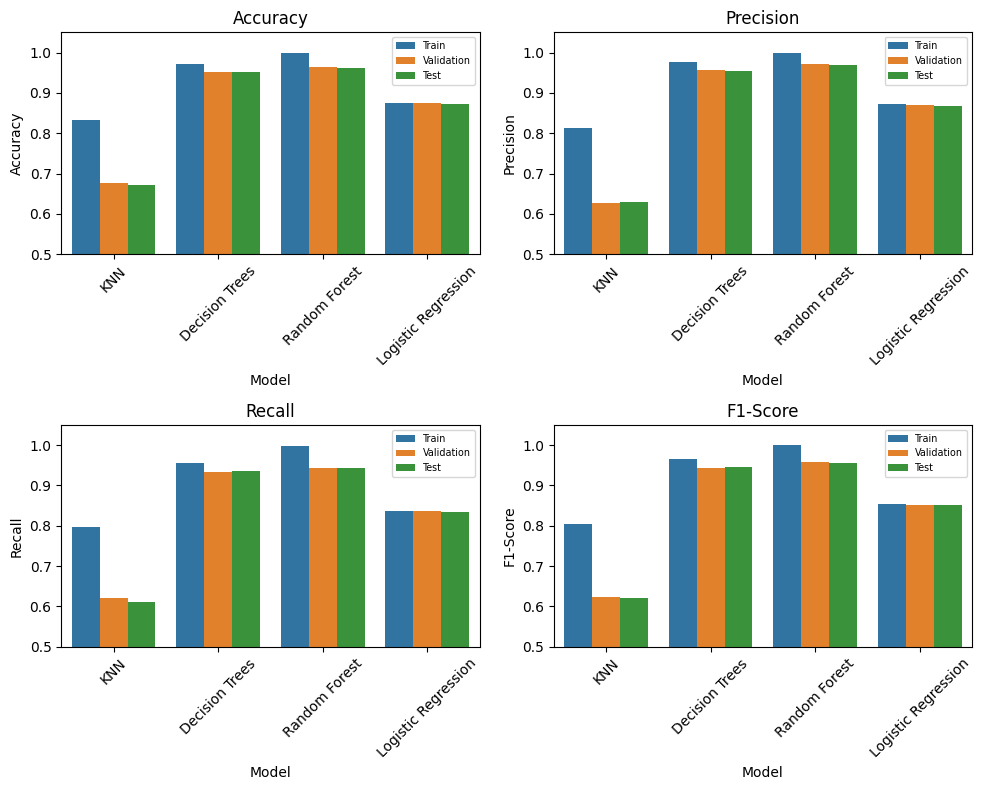

In [189]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title('Accuracy')
sns.barplot(x='Model', y='Accuracy', data=results, hue='Dataset')
plt.xticks(rotation=45)
plt.ylim(0.5,1.05)
plt.legend(fontsize='x-small', title_fontsize='10')

plt.subplot(2,2,2)
plt.title('Precision')
sns.barplot(x='Model', y='Precision', data=results, hue='Dataset')
plt.xticks(rotation=45)
plt.ylim(0.5,1.05)
plt.legend(fontsize='x-small', title_fontsize='10')

plt.subplot(2,2,3)
plt.title('Recall')
sns.barplot(x='Model', y='Recall', data=results, hue='Dataset')
plt.xticks(rotation=45)
plt.ylim(0.5,1.05)
plt.legend(fontsize='x-small', title_fontsize='10')

plt.subplot(2,2,4)
plt.title('F1-Score')
sns.barplot(x='Model', y='F1-Score', data=results, hue='Dataset')
plt.xticks(rotation=45)
plt.ylim(0.5,1.05)
plt.legend(fontsize='x-small', title_fontsize='10')

plt.tight_layout()